In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
img = cv2.imread("flow.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
test_str = "Hi_my_name_is_SUBARNA_"
res = ''.join(format(ord(i), 'b') for i in test_str)
print(res)

1001000110100110111111101101111100110111111101110110000111011011100101101111111010011110011101111110100111010101100001010000011010010100111010000011011111


In [5]:
img.shape

(780, 1166, 3)

In [6]:
plt.figure(figsize = (20,8))
plt.imshow(img)

In [7]:
img_new = img.copy()

In [8]:
#encoding the name(or secret message)

q = 0
r = 0
for i in range (0,len(res)):
    
    s = '{0:08b}'.format(img_new[0,q,r])
    
    if(s[7] == res[i]):
        r = r + 1
        if(r <= 2):
            continue
        else:
            r = 0
            q = q + 1
        continue
    elif(s[7] == '1'):
        img_new[0,q,r] = img_new[0,q,r] - 1
    else:
        img_new[0,q,r] = img_new[0,q,r] + 1
    
    r = r + 1
    
    if(r <= 2):
        continue
    else:
        r = 0
        q = q + 1

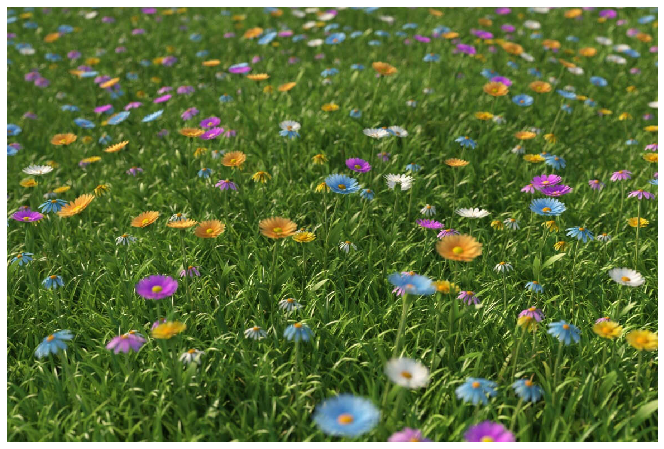

In [9]:
plt.figure(figsize = (20,8))
plt.axis("off")
plt.savefig("img_new.png")
plt.imshow(img_new)

In [10]:
#Decoding our secret message

q = 0
r = 0
p = ''
t = ''
u = 0
for i in range(0,301):
    s = '{0:08b}'.format(img_new[0,q,r])
    p = p + s[7]
    r = r + 1
    
    if(u == 6):
        t = t + chr(int(p,2))
        p = ''
        u = -1
    
    u = u + 1
    if(r <= 2):
        continue
    else:
        r = 0
        q = q + 1

print(t)

Hi_my_name_is_SUBARNA_vIFO{,F8RaEFl-X:
